# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from config import api_key
#api_key = "8a0815ae41954532d12b06638eef7973"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs)
print(len(lats))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

1500


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Initialize DataFrame to store data
Weather_df=pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
#print(Weather_df)
count=1
set_num=1
error_num=0
index=0

print("Beginning Data Retrieval\n-----------------------------")

#looping through each city 
for city in cities:
    #Exception Handling using try & except 
    try:
        #Create url for API call
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = f"{base_url}appid={api_key}&units=imperial&q="
       
        #API call for corresponding city
        city_weather= requests.get(query_url + city).json()
        
        #print log for each city
        print(f"Processing Record {count} of Set {set_num}  | {city}")
        
        #Fill the DataFrame with the weather data for the city
        Weather_df.set_value(index, "City", city_weather["name"])
        Weather_df.set_value(index, "Cloudiness", city_weather["clouds"]["all"])
        Weather_df.set_value(index, "Country", city_weather["sys"]["country"])
        Weather_df.set_value(index, "Date", city_weather["dt"])
        Weather_df.set_value(index, "Max Temp", city_weather["main"]["temp_max"])
        Weather_df.set_value(index, "Wind Speed", city_weather["wind"]["speed"])
        Weather_df.set_value(index, "Lat", city_weather["coord"]["lat"])
        Weather_df.set_value(index, "Lng", city_weather["coord"]["lon"])
        Weather_df.set_value(index, "Humidity", city_weather["main"]["humidity"])
        
        #Increment the index
        index+=1
        
    except KeyError:
        print("City not found. Skipping...")
        error_num+=1
        
    count+=1
    if count==50:
        count=0
        set_num+=1
    
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
print(f"There are not data for {error_num} cities")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1  | kiunga


C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sakar Pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors ins

Processing Record 2 of Set 1  | arys
Processing Record 3 of Set 1  | marcona
City not found. Skipping...
Processing Record 4 of Set 1  | klaksvik
Processing Record 5 of Set 1  | punta arenas
Processing Record 6 of Set 1  | ust-ilimsk
Processing Record 7 of Set 1  | castro
Processing Record 8 of Set 1  | ribeira grande
Processing Record 9 of Set 1  | camocim
Processing Record 10 of Set 1  | bredasdorp
Processing Record 11 of Set 1  | new norfolk
Processing Record 12 of Set 1  | jamestown
Processing Record 13 of Set 1  | chokurdakh
Processing Record 14 of Set 1  | severo-kurilsk
Processing Record 15 of Set 1  | tiksi
Processing Record 16 of Set 1  | bluff
Processing Record 17 of Set 1  | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1  | teya
Processing Record 19 of Set 1  | vardo
Processing Record 20 of Set 1  | balakhta
Processing Record 21 of Set 1  | barrow
Processing Record 22 of Set 1  | hobart
Processing Record 23 of Set 1  | ushuaia
Processing Record 24 of S

Processing Record 38 of Set 4  | catamarca
City not found. Skipping...
Processing Record 39 of Set 4  | high level
Processing Record 40 of Set 4  | casas grandes
Processing Record 41 of Set 4  | porto novo
Processing Record 42 of Set 4  | banda aceh
Processing Record 43 of Set 4  | celestun
Processing Record 44 of Set 4  | bodden town
Processing Record 45 of Set 4  | el alto
Processing Record 46 of Set 4  | constitucion
Processing Record 47 of Set 4  | port lincoln
Processing Record 48 of Set 4  | naryan-mar
Processing Record 49 of Set 4  | nelson bay
Processing Record 0 of Set 5  | kez
Processing Record 1 of Set 5  | mountain home
Processing Record 2 of Set 5  | bardiyah
City not found. Skipping...
Processing Record 3 of Set 5  | vila do maio
Processing Record 4 of Set 5  | woodstock
Processing Record 5 of Set 5  | avarua
Processing Record 6 of Set 5  | narsaq
Processing Record 7 of Set 5  | sao felix do xingu
Processing Record 8 of Set 5  | rungata
City not found. Skipping...
Process

Processing Record 20 of Set 8  | palmer
Processing Record 21 of Set 8  | abakaliki
Processing Record 22 of Set 8  | lata
Processing Record 23 of Set 8  | livingstonia
Processing Record 24 of Set 8  | polunochnoye
Processing Record 25 of Set 8  | vanimo
Processing Record 26 of Set 8  | saldanha
Processing Record 27 of Set 8  | krasnyy chikoy
Processing Record 28 of Set 8  | tananger
Processing Record 29 of Set 8  | chapais
Processing Record 30 of Set 8  | cidreira
Processing Record 31 of Set 8  | harper
Processing Record 32 of Set 8  | tukrah
City not found. Skipping...
Processing Record 33 of Set 8  | te anau
Processing Record 34 of Set 8  | villanueva
Processing Record 35 of Set 8  | lorengau
Processing Record 36 of Set 8  | buala
Processing Record 37 of Set 8  | san cristobal
Processing Record 38 of Set 8  | kano
Processing Record 39 of Set 8  | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 8  | tazovskiy
Processing Record 41 of Set 8  | nemuro
Processing Recor

Processing Record 1 of Set 12  | esso
Processing Record 2 of Set 12  | qurayyat
City not found. Skipping...
Processing Record 3 of Set 12  | mgandu
Processing Record 4 of Set 12  | oktyabrskiy
Processing Record 5 of Set 12  | shizunai
Processing Record 6 of Set 12  | curup
Processing Record 7 of Set 12  | naliya
Processing Record 8 of Set 12  | palauig
Processing Record 9 of Set 12  | katsiveli
City not found. Skipping...
Processing Record 10 of Set 12  | oussouye
Processing Record 11 of Set 12  | bargal
City not found. Skipping...
Processing Record 12 of Set 12  | sayyan
Processing Record 13 of Set 12  | haines junction
Processing Record 14 of Set 12  | namibe
Processing Record 15 of Set 12  | bell ville
Processing Record 16 of Set 12  | rome
Processing Record 17 of Set 12  | north bend
Processing Record 18 of Set 12  | antofagasta
Processing Record 19 of Set 12  | brodokalmak
Processing Record 20 of Set 12  | mount gambier
Processing Record 21 of Set 12  | yerbogachen
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Export data into csv file
Weather_df.to_csv('City_Weather.csv')
print(Weather_df.count())

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64


In [6]:
Weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kiunga,92,PG,1549326617,100,-6.12,141.3,74.14,2.95
1,Arys,90,KZ,1549324800,100,42.43,68.8,30.2,2.24
2,Klaksvik,0,FO,1549324200,79,62.23,-6.59,28.4,1.12
3,Punta Arenas,0,CL,1549324800,43,-53.16,-70.91,69.8,11.41
4,Ust-Ilimsk,0,RU,1549326619,0,57.96,102.73,-46.51,2.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

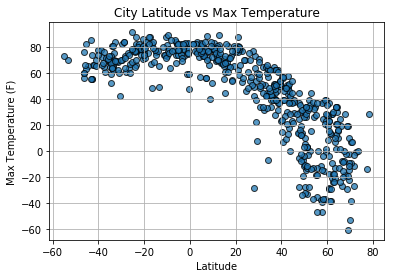

In [19]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.scatter(Weather_df["Lat"], Weather_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

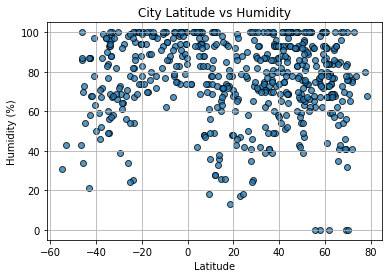

In [20]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel(f"Humidity (%)")
plt.scatter(Weather_df["Lat"], Weather_df["Humidity"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

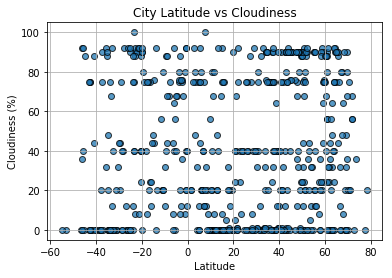

In [21]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.scatter(Weather_df["Lat"], Weather_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

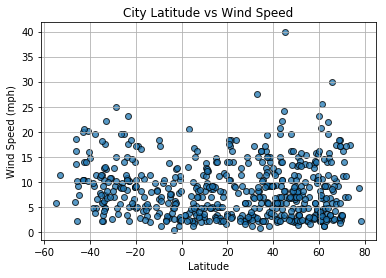

In [22]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.scatter(Weather_df["Lat"], Weather_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.75)
plt.grid()
plt.show()